# Job Monitoring Performance Metrics for GPU

This notebook takes a filtered job monitoring log and produces figures of the recorded metrics. 

In [1]:
import yaml
import datetime
import pytz
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot

# Functions used throughout
def format_plot(fig,ax):
   matplotlib.style.use('fivethirtyeight')
   matplotlib.pyplot.set_cmap('tab10')
   ax.grid(True)
   ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
   fig.set_size_inches(11.69, 8.27)
   ax.set_xlabel('Job Run Time (s)', fontsize = 16, weight = 'bold')
   ax.set_ylabel('GPU Utlisation (%)', fontsize = 16, weight = 'bold')
   ax.set_facecolor('lightgrey')

ModuleNotFoundError: No module named 'matplotlib'

Change the path of logfile to wherever your filtered log file is.

In [44]:
logfile='your/logfile/here'

Extract filename and date from 'logfile'

In [45]:
logfile_date = logfile[-23:-13]
logfile_date

'your'

## Use pandas to read in log file from nvidia-smi

In [11]:
gpu_data = pd.read_csv(logfile, delim_whitespace=True, header=None)

In [12]:
# gpu    sm   mem   enc   dec    fb  bar1 rxpci txpci   pwr  temp
gpu_data.columns = ['Time', 'GPU_Index', 'Utilisation', 'Memory', 'Video_encoding', 'Video_decoding', 'Mem_usage', 'bar1', 'Transfer_in' ,'Transfer_out' ,'Power' ,'GPUTemp', 'MemoryTemp']
# Move the start time to zero
gpu_data.Time = gpu_data.Time - gpu_data.Time.min()
gpu_data.head(10)

,Time,GPU_Index,Utilisation,Memory,Video_encoding,Video_decoding,Mem_usage,bar1,Transfer_in,Transfer_out,Power,GPUTemp,MemoryTemp
0,0.000000,0,0,0,0,0,3,3,0,0,9,32,-
1,1.053325,0,4,0,0,0,14344,7,0,20,26,33,-
2,2.108498,0,3,0,0,0,14528,7,300,41,26,33,-
3,3.181700,0,1,0,0,0,14732,7,0,0,27,33,-
4,4.228528,0,2,0,0,0,14732,7,0,0,27,33,-
5,5.280593,0,50,36,0,0,14732,7,235,35,55,35,-
6,6.327029,0,55,39,0,0,14732,7,237,35,55,36,-
7,7.380860,0,4,2,0,0,14732,7,39,5,33,35,-
8,8.433519,0,4,2,0,0,14732,7,39,5,34,35,-
9,9.482740,0,1,0,0,0,14732,7,0,0,26,35,-


## Plot GPU utilisation and memory transfers


Memory = Percent of time over the past sample period during which global (device) memory was being read or written.
The sample period may be between 1 second and 1/6 second depending on the product.

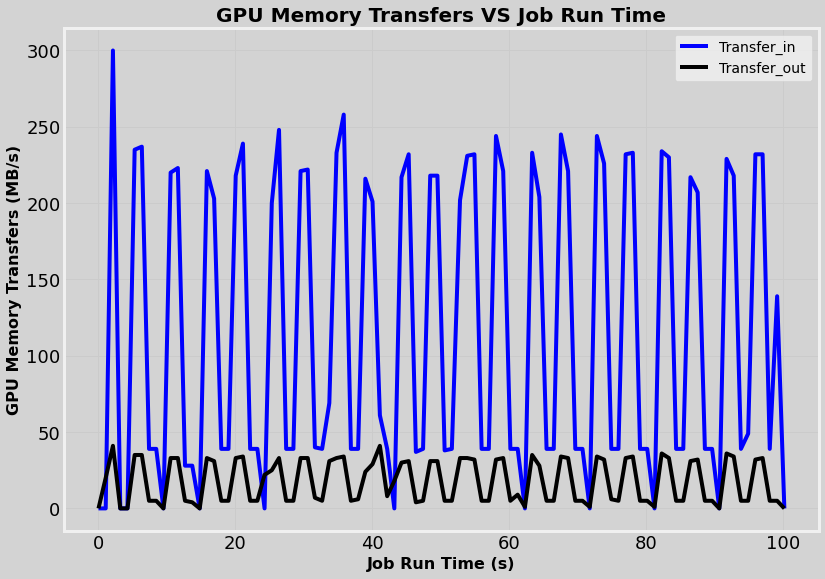

In [35]:
ax = gpu_data.plot(x='Time', y=['Transfer_in','Transfer_out'],color=['b','black'])

# Set the background to match
fig = matplotlib.pyplot.gcf()
fig.patch.set_facecolor('lightgrey')

# Set titles and labels
ax.set_title('GPU Memory Transfers VS Job Run Time', fontsize = 20, weight = 'bold')
format_plot(fig,ax)
ax.set_ylabel('GPU Memory Transfers (MB/s)')

# Save graph of folder creation
filename = 'Tutorial-GPU-Memory-Transfers' + '.png'

# Adjust layout to ensure saved file fits
matplotlib.pyplot.tight_layout()

# Edit with the filepath where you want to save your plots
matplotlib.pyplot.savefig('your/place/to/save/plots' + filename, dpi = (300), facecolor=fig.get_facecolor())

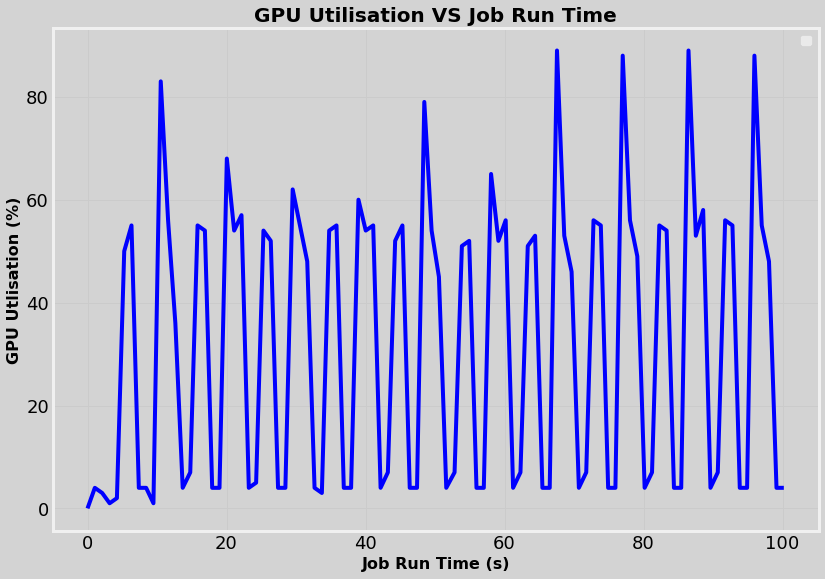

In [29]:
ax = gpu_data.plot(x='Time', y=['Utilisation'],color=['b'])
# Set the background to match
fig = matplotlib.pyplot.gcf()
fig.patch.set_facecolor('lightgrey')

# Remove legend
ax.legend('')

ax.set_title('GPU Utilisation VS Job Run Time', fontsize = 20, weight = 'bold')
format_plot(fig,ax)

# Save graph of folder creation
filename = 'Tutorial-GPU-Utilisation' + '.png'
# Adjust layout to ensure saved file fits
matplotlib.pyplot.tight_layout()
# Edit with your own filepath
matplotlib.pyplot.savefig('your/place/to/save/plots' + filename, dpi = (300), facecolor=fig.get_facecolor())

In [46]:
util_mean = gpu_data.Utilisation.mean()
print("Your mean gpu utilization is: " + str(round(util_mean, 2)) + "%")

Your mean gpu utilization is: 32.05%


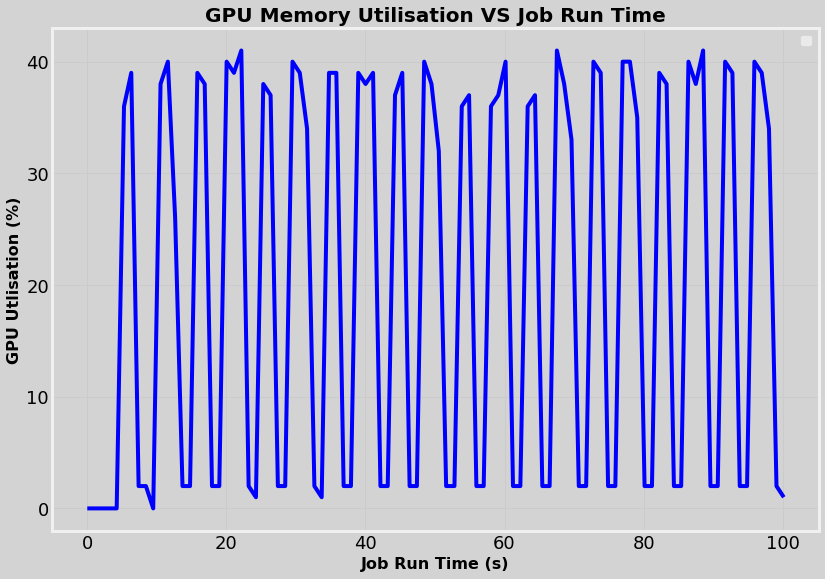

In [33]:
ax = gpu_data.plot(x='Time', y=['Memory'],color=['b'])
# Set the background to match
fig = matplotlib.pyplot.gcf()
fig.patch.set_facecolor('lightgrey')
# Remove legend
ax.legend('')
#legend((line1, line2, line3), ('label1', 'label2', 'label3'))
ax.set_title('GPU Memory Utilisation VS Job Run Time', fontsize = 20, weight = 'bold')
format_plot(fig,ax)

# Save graph of folder creation
filename = 'Tutorial-GPU-Memory-Utilisation' + '.png'
# Adjust layout to ensure saved file fits
matplotlib.pyplot.tight_layout()
# Edit with your own filepath
matplotlib.pyplot.savefig('your/place/to/save/plots' + filename, dpi = (300), facecolor=fig.get_facecolor())


In [47]:
gpu_mem_mean = gpu_data.Memory.mean()
print("Your mean gpu memory utilization is: " + str(round(gpu_mem_mean, 2)) + "%")

Your mean gpu memory utilization is: 20.56%


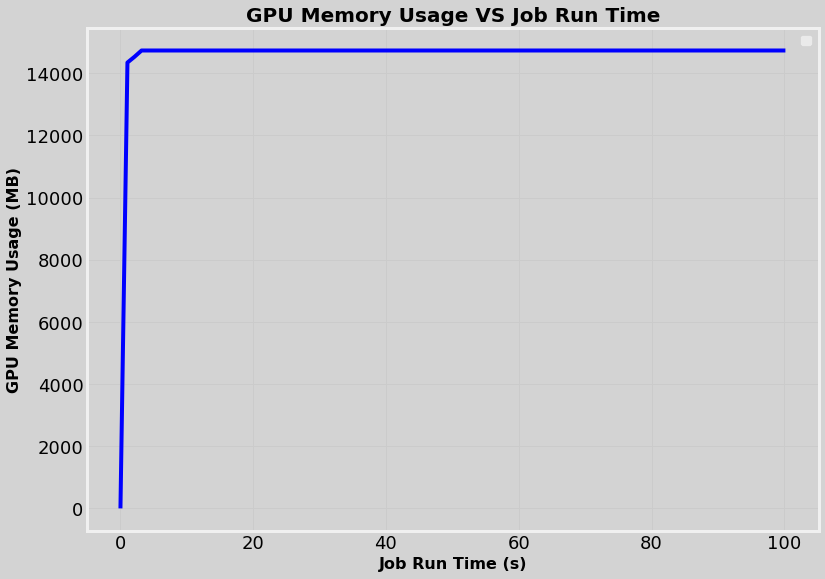

In [31]:
ax = gpu_data.plot(x='Time', y=['Mem_usage'],color=['b'])
# Set the background to match
fig = matplotlib.pyplot.gcf()
fig.patch.set_facecolor('lightgrey')
# Remove legend
ax.legend('')
#legend((line1, line2, line3), ('label1', 'label2', 'label3'))
ax.set_title('GPU Memory Usage VS Job Run Time', fontsize = 20, weight = 'bold')
format_plot(fig,ax)
ax.set_ylabel('GPU Memory Usage (MB)')

# Save graph of folder creation
filename = 'Tutorial-GPU-Memory-Usage' + '.png'
# Adjust layout to ensure saved file fits
matplotlib.pyplot.tight_layout()
# Edit with your own filepath
matplotlib.pyplot.savefig('your/place/to/save/plots' + filename, dpi = (300), facecolor=fig.get_facecolor())

In [48]:
mem_mean = gpu_data.Mem_usage.mean()
print("Your mean GPU memory usage is: " + str(round(mem_mean, 2)) + "MB")

Your mean GPU memory usage is: 14572.41MB


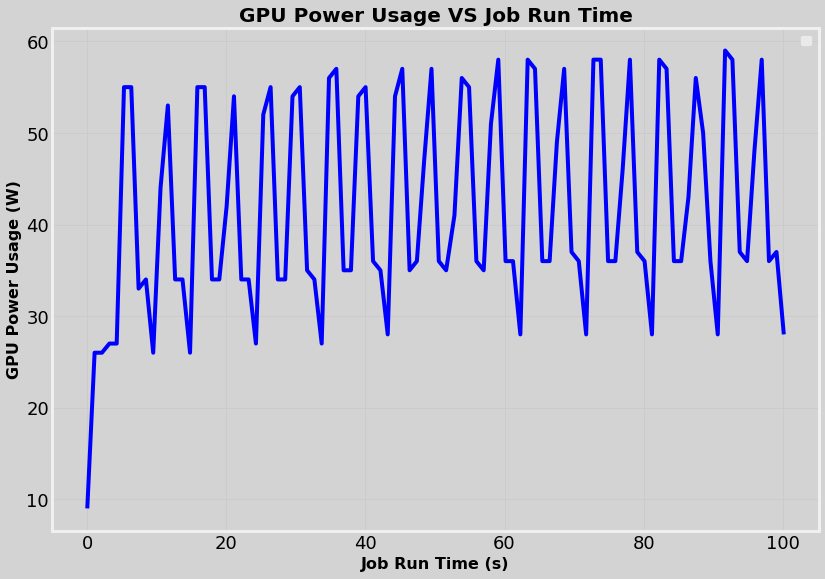

In [36]:
ax = gpu_data.plot(x='Time', y=['Power'],color=['b'])
# Set the background to match
fig = matplotlib.pyplot.gcf()
fig.patch.set_facecolor('lightgrey')
# Remove legend
ax.legend('')
#legend((line1, line2, line3), ('label1', 'label2', 'label3'))
ax.set_title('GPU Power Usage VS Job Run Time', fontsize = 20, weight = 'bold')
format_plot(fig,ax)
ax.set_ylabel('GPU Power Usage (W)')

# Save graph of folder creation
filename = 'Tutorial-GPU-Power-Usage' + '.png'
# Adjust layout to ensure saved file fits
matplotlib.pyplot.tight_layout()
# Edit with your own filepath
matplotlib.pyplot.savefig('your/place/to/save/plots' + filename, dpi = (300), facecolor=fig.get_facecolor())

In [49]:
power_mean = gpu_data.Power.mean()
print("Your mean power usage is: " + str(round(power_mean, 2)) + "W")

Your mean power usage is: 41.9W


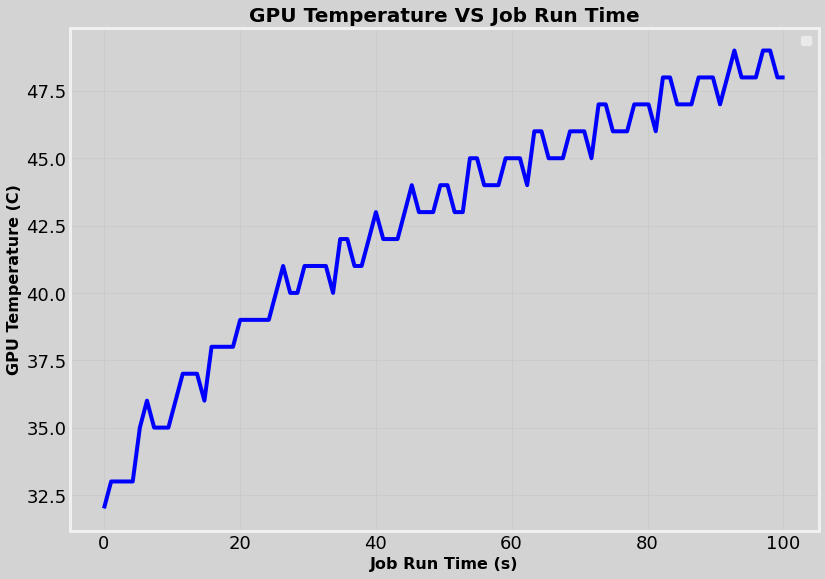

In [55]:
ax = gpu_data.plot(x='Time', y=['GPUTemp'],color=['b'])
# Set the background to match
fig = matplotlib.pyplot.gcf()
fig.patch.set_facecolor('lightgrey')
# Remove legend
ax.legend('')
#legend((line1, line2, line3), ('label1', 'label2', 'label3'))
ax.set_title('GPU Temperature VS Job Run Time', fontsize = 20, weight = 'bold')
format_plot(fig,ax)
ax.set_ylabel('GPU Temperature (C)')

# Save graph of folder creation
filename = 'Tutorial-GPU-Temp' + '.png'
# Adjust layout to ensure saved file fits
matplotlib.pyplot.tight_layout()
# Edit with your own filepath
matplotlib.pyplot.savefig('your/place/to/save/plots' + filename, dpi = (300), facecolor=fig.get_facecolor())

In [57]:
gpu_temp_mean = gpu_data.GPUTemp.mean()
print("Your mean GPU temperature is: " + str(round(gpu_temp_mean, 2)) + "°C")

Your mean GPU temperature is: 42.66°C
